In [1]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('data/student_performance.csv')
df.head(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

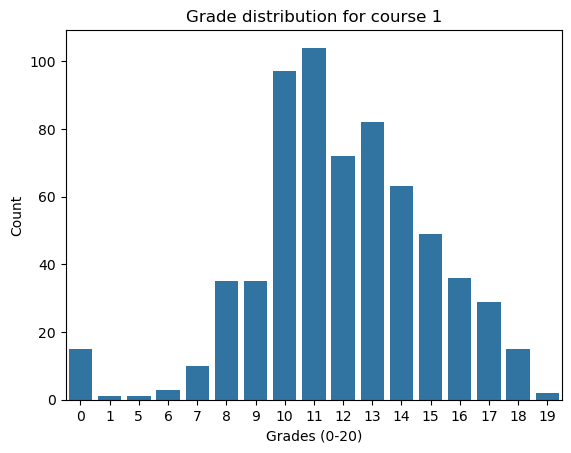

In [5]:
sns.countplot(x='G3', data=df)
plt.title('Grade distribution for course 1')
plt.xlabel('Grades (0-20)')
plt.ylabel('Count')
plt.show()

In [6]:
# Rename columns
df.rename(columns={'G1': 'period_1_grades', 'G2': 'period_2_grades', 'G3': 'final_grade'}, inplace=True)

In [7]:
# Create binary target variable
df['passed'] = df['final_grade'].apply(lambda x: True if x >= 10 else False)

# check the value counts
df['passed'].value_counts()

passed
True     549
False    100
Name: count, dtype: int64

In [8]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'period_1_grades', 'period_2_grades', 'final_grade']


In [9]:
# Identify numerical columns
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                  'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                  'absences', 'period_1_grades', 'period_2_grades']

# Create a new DataFrame with only numerical features and the target variable
df_numeric = df[numerical_cols + ['passed']]

# Check for missing values
print("Missing values in each column:")
print(df_numeric.isnull().sum())

Missing values in each column:
age                0
Medu               0
Fedu               0
traveltime         0
studytime          0
failures           0
famrel             0
freetime           0
goout              0
Dalc               0
Walc               0
health             0
absences           0
period_1_grades    0
period_2_grades    0
passed             0
dtype: int64


In [10]:
# Separate features and target variable
X = df_numeric.drop(columns=['passed'])
y = df_numeric['passed']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()
  
# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9179487179487179
Confusion Matrix:
[[ 19   7]
 [  9 160]]


In [13]:
# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(cm_rf)

Accuracy: 0.9487179487179487
Confusion Matrix:
[[ 20   6]
 [  4 165]]


In [14]:
#init Gaussian Naive Bayes
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:")
print(cm_nb)

Accuracy: 0.9076923076923077
Confusion Matrix:
[[ 20   6]
 [ 12 157]]
